In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np 
import copy

In [2]:
# image_color = cv2.imread('data/color/color47.png')
# image_depth = cv2.imread('data/depth/depth47.png', cv2.IMREAD_ANYDEPTH)

# image_color = cv2.imread('data/color/color16087244643814638.png')
# image_depth = cv2.imread('data/depth/depth16087244643814638.png', cv2.IMREAD_ANYDEPTH)
image_color = cv2.imread('images/20201223_205022/color/color16087242271484966.png')
image_depth = cv2.imread('images/20201223_205022/depth/depth16087242271484966.png', cv2.IMREAD_ANYDEPTH)

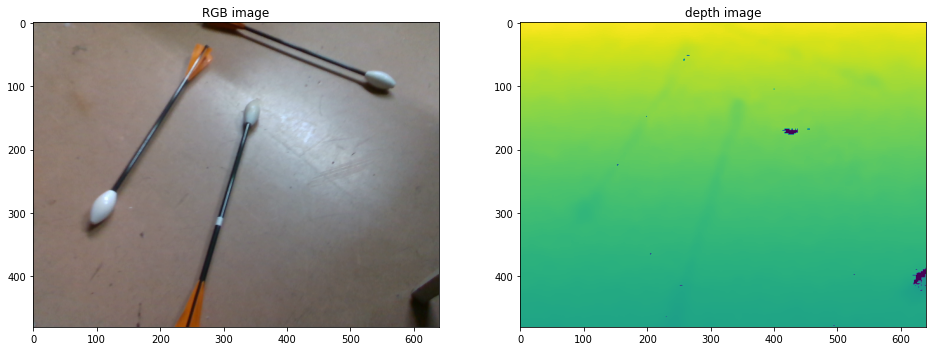

In [3]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.title('RGB image')
image_color_RGB = cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB)
plt.imshow(image_color_RGB)
plt.subplot(1, 2, 2)
plt.title('depth image')
plt.imshow(image_depth)

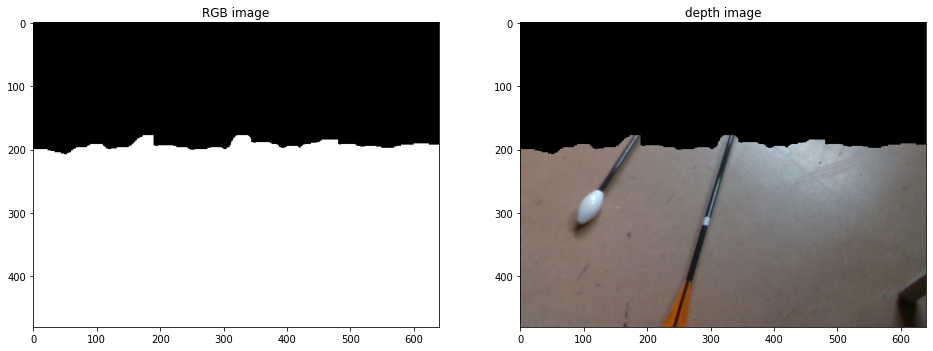

In [21]:
ret, sure_bg = cv2.threshold(image_depth, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
kernel = np.ones((5, 5), np.uint8)
sure_bg = cv2.morphologyEx(sure_bg, cv2.MORPH_OPEN, kernel, iterations=2)
sure_bg = cv2.dilate(sure_bg, kernel, iterations=2)
sure_bg = np.uint8(sure_bg)

sure_bg_RGB = cv2.cvtColor(sure_bg, cv2.COLOR_GRAY2RGB)
image_color_forground = cv2.bitwise_and(image_color_RGB, sure_bg_RGB)

plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.title('RGB image')
plt.imshow(sure_bg_RGB, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('depth image')
plt.imshow(image_color_forground)

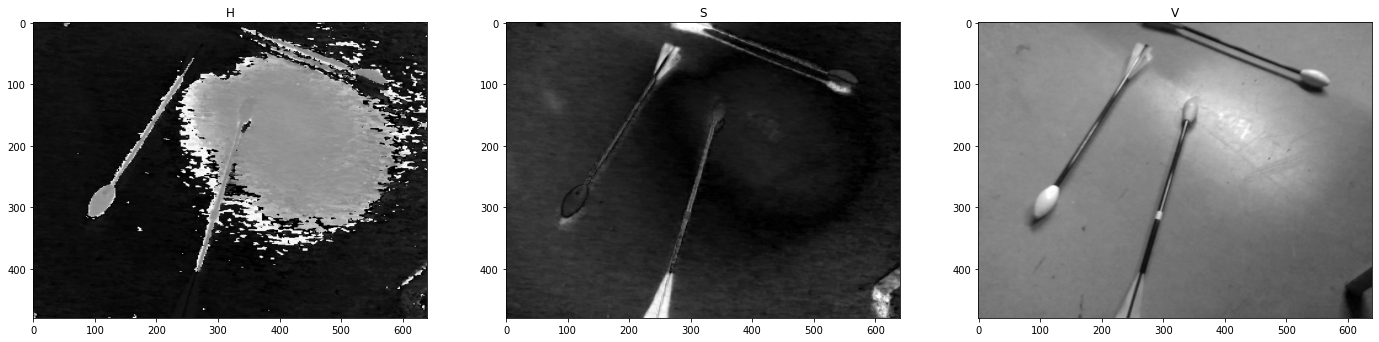

In [5]:
image_hsv = cv2.cvtColor(image_color, cv2.COLOR_BGR2HSV)

plt.figure(figsize=(24, 6))
plt.subplot(1, 3, 1)
plt.title('H')
plt.imshow(image_hsv[:, :, 0], cmap='gray')
plt.subplot(1, 3, 2)
plt.title('S')
plt.imshow(image_hsv[:, :, 1], cmap='gray')
plt.subplot(1, 3, 3)
plt.title('V')
plt.imshow(image_hsv[:, :, 2], cmap='gray')

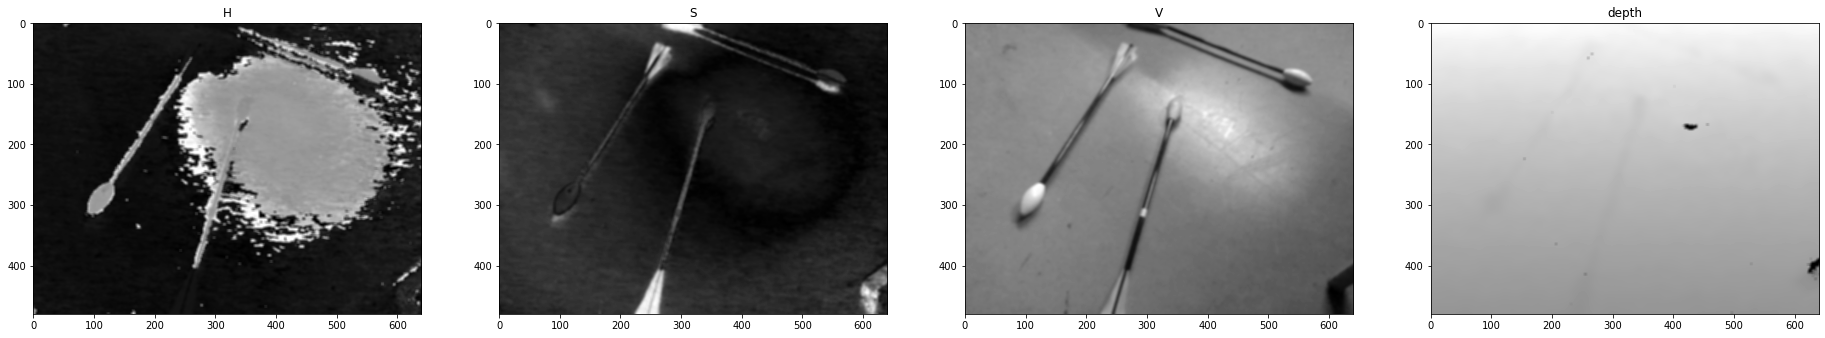

In [6]:
blur_hsv = cv2.blur(image_hsv, (5, 5))
blur_depth = cv2.blur(image_depth, (5, 5))

plt.figure(figsize=(32, 6))
plt.subplot(1, 4, 1)
plt.title('H')
plt.imshow(blur_hsv[:, :, 0], cmap='gray')
plt.subplot(1, 4, 2)
plt.title('S')
plt.imshow(blur_hsv[:, :, 1], cmap='gray')
plt.subplot(1, 4, 3)
plt.title('V')
plt.imshow(blur_hsv[:, :, 2], cmap='gray')
plt.subplot(1, 4, 4)
plt.title('depth')
plt.imshow(blur_depth, cmap='gray')

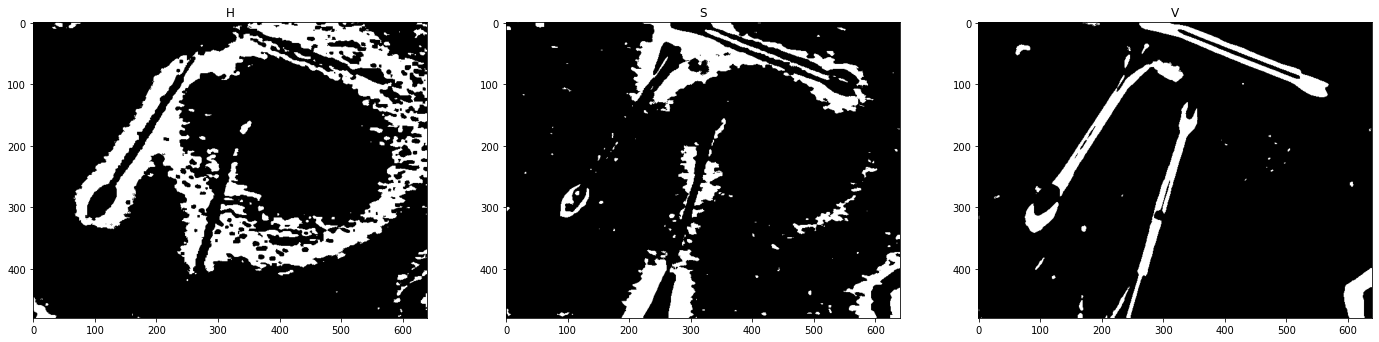

In [16]:
# ret, thresh_H = cv2.threshold(blur_hsv[:, :, 0], 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
# ret, thresh_S = cv2.threshold(blur_hsv[:, :, 1], 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
# ret, thresh_V = cv2.threshold(image_hsv[:, :, 2], 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
thresh_H = cv2.adaptiveThreshold(blur_hsv[:, :, 0], 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 151, 9)
thresh_S = cv2.adaptiveThreshold(blur_hsv[:, :, 1], 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 151, 9)
thresh_V = cv2.adaptiveThreshold(blur_hsv[:, :, 2], 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 151, 9)

plt.figure(figsize=(24, 6))
plt.subplot(1, 3, 1)
plt.title('H')
plt.imshow(thresh_H, cmap='gray')
plt.subplot(1, 3, 2)
plt.title('S')
plt.imshow(thresh_S, cmap='gray')
plt.subplot(1, 3, 3)
plt.title('V')
plt.imshow(thresh_V, cmap='gray')

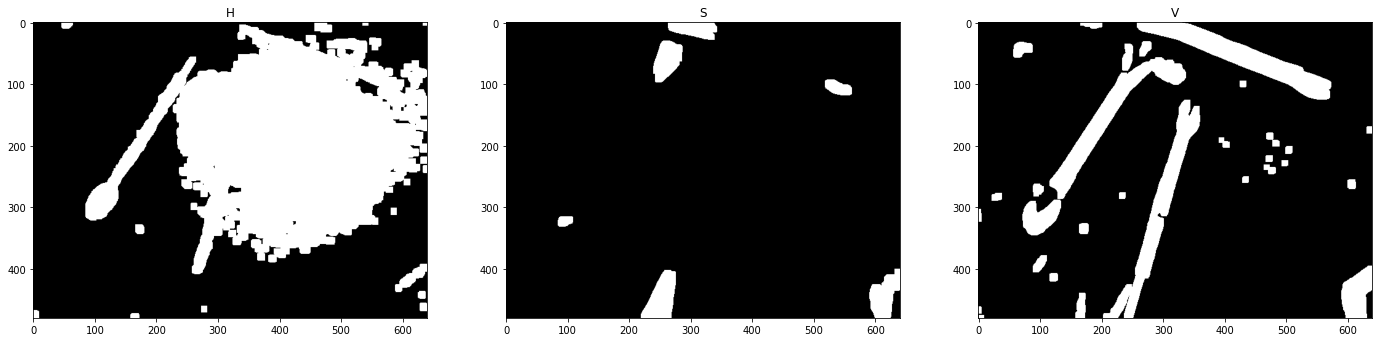

In [8]:
kernel = np.ones((5, 5), np.uint8)
thresh_dilation_H = cv2.dilate(thresh_H, kernel, iterations=2)
thresh_dilation_S = cv2.dilate(thresh_S, kernel, iterations=2)
thresh_dilation_V = cv2.dilate(thresh_V, kernel, iterations=2)

plt.figure(figsize=(24, 6))
plt.subplot(1, 3, 1)
plt.title('H')
plt.imshow(thresh_dilation_H, cmap='gray')
plt.subplot(1, 3, 2)
plt.title('S')
plt.imshow(thresh_dilation_S, cmap='gray')
plt.subplot(1, 3, 3)
plt.title('V')
plt.imshow(thresh_dilation_V, cmap='gray')

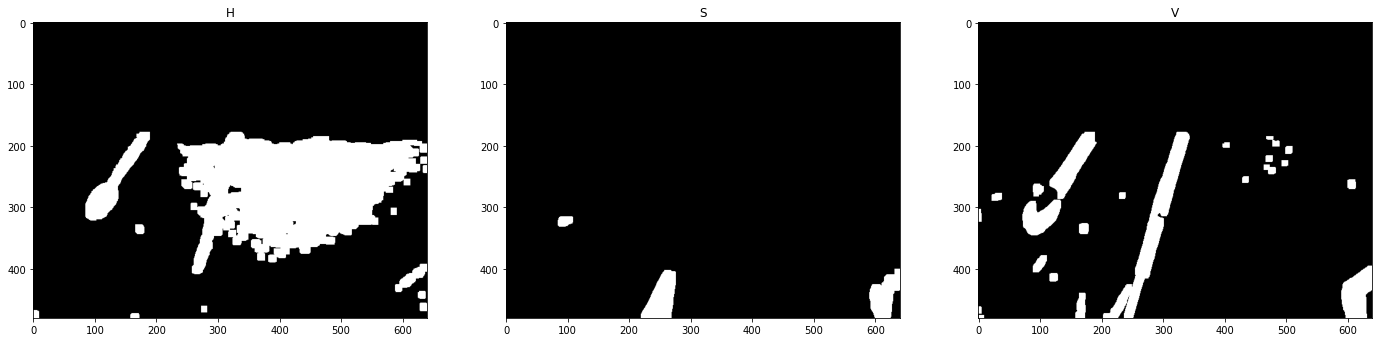

In [9]:
thresh_forground_H = cv2.bitwise_and(thresh_dilation_H, sure_bg)
thresh_forground_S = cv2.bitwise_and(thresh_dilation_S, sure_bg)
thresh_forground_V = cv2.bitwise_and(thresh_dilation_V, sure_bg)

plt.figure(figsize=(24, 6))
plt.subplot(1, 3, 1)
plt.title('H')
plt.imshow(thresh_forground_H, cmap='gray')
plt.subplot(1, 3, 2)
plt.title('S')
plt.imshow(thresh_forground_S, cmap='gray')
plt.subplot(1, 3, 3)
plt.title('V')
plt.imshow(thresh_forground_V, cmap='gray')

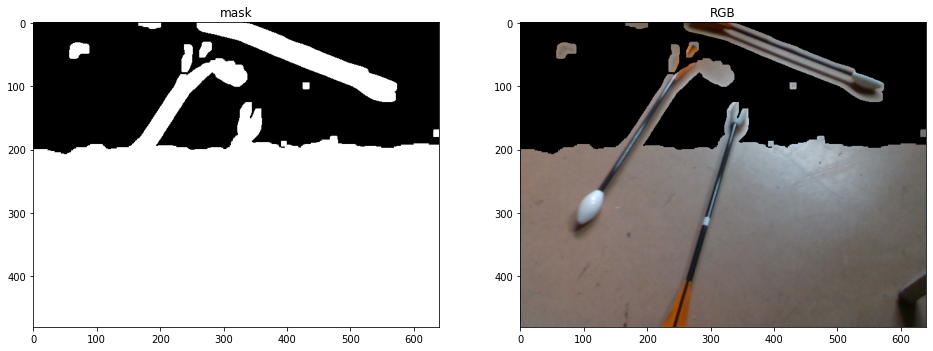

In [10]:
mask = cv2.bitwise_or(sure_bg, thresh_dilation_V)

mask_RGB = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)
image_color_forground = cv2.bitwise_and(image_color_RGB, mask_RGB)

plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.title('mask')
plt.imshow(mask, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('RGB')
plt.imshow(image_color_forground)

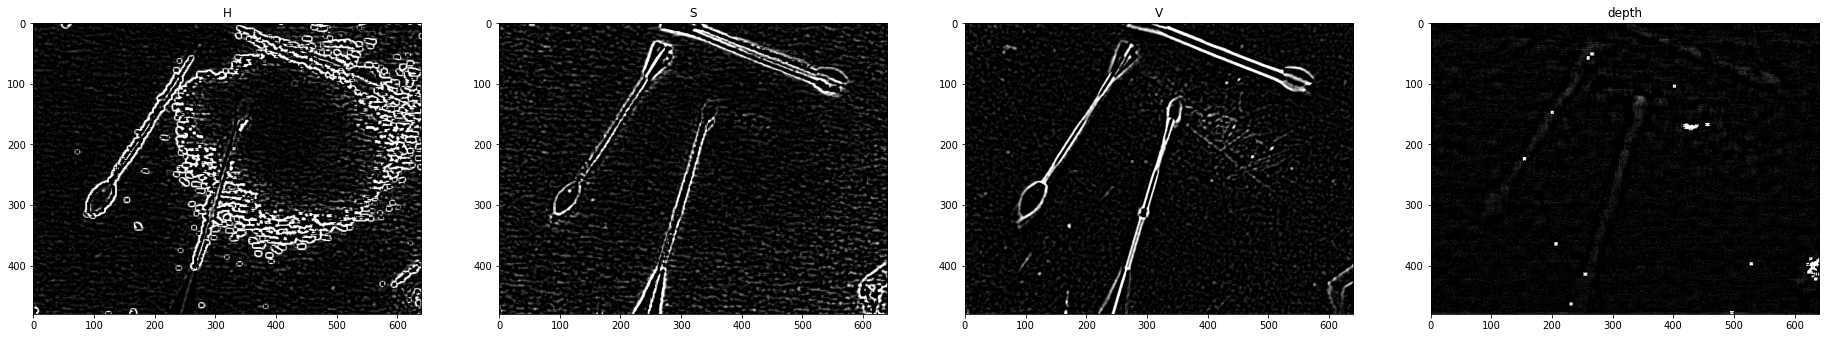

In [11]:
laplacian_hsv = cv2.Laplacian(blur_hsv, ddepth=cv2.CV_8U, ksize=5)
laplacian_depth = cv2.Laplacian(blur_depth, ddepth=cv2.CV_8U, ksize=5)

plt.figure(figsize=(32, 6))
plt.subplot(1, 4, 1)
plt.title('H')
plt.imshow(laplacian_hsv[:, :, 0], cmap='gray')
plt.subplot(1, 4, 2)
plt.title('S')
plt.imshow(laplacian_hsv[:, :, 1], cmap='gray')
plt.subplot(1, 4, 3)
plt.title('V')
plt.imshow(laplacian_hsv[:, :, 2], cmap='gray')
plt.subplot(1, 4, 4)
plt.title('depth')
plt.imshow(laplacian_depth, cmap='gray')

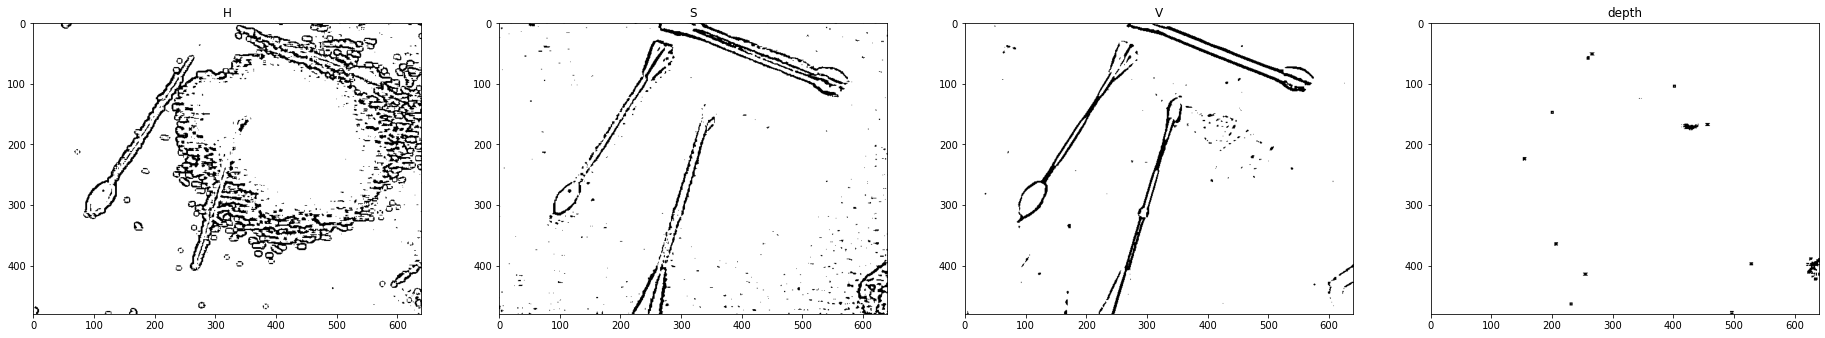

In [12]:
ret, laplacian_thresh_H = cv2.threshold(laplacian_hsv[:, :, 0], 0, 1, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
ret, laplacian_thresh_S = cv2.threshold(laplacian_hsv[:, :, 1], 0, 1, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
ret, laplacian_thresh_V = cv2.threshold(laplacian_hsv[:, :, 2], 0, 1, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
ret, laplacian_thresh_depth = cv2.threshold(laplacian_depth, 0, 1, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

plt.figure(figsize=(32, 6))
plt.subplot(1, 4, 1)
plt.title('H')
plt.imshow(laplacian_thresh_H, cmap='gray')
plt.subplot(1, 4, 2)
plt.title('S')
plt.imshow(laplacian_thresh_S, cmap='gray')
plt.subplot(1, 4, 3)
plt.title('V')
plt.imshow(laplacian_thresh_V, cmap='gray')
plt.subplot(1, 4, 4)
plt.title('depth')
plt.imshow(laplacian_thresh_depth, cmap='gray')

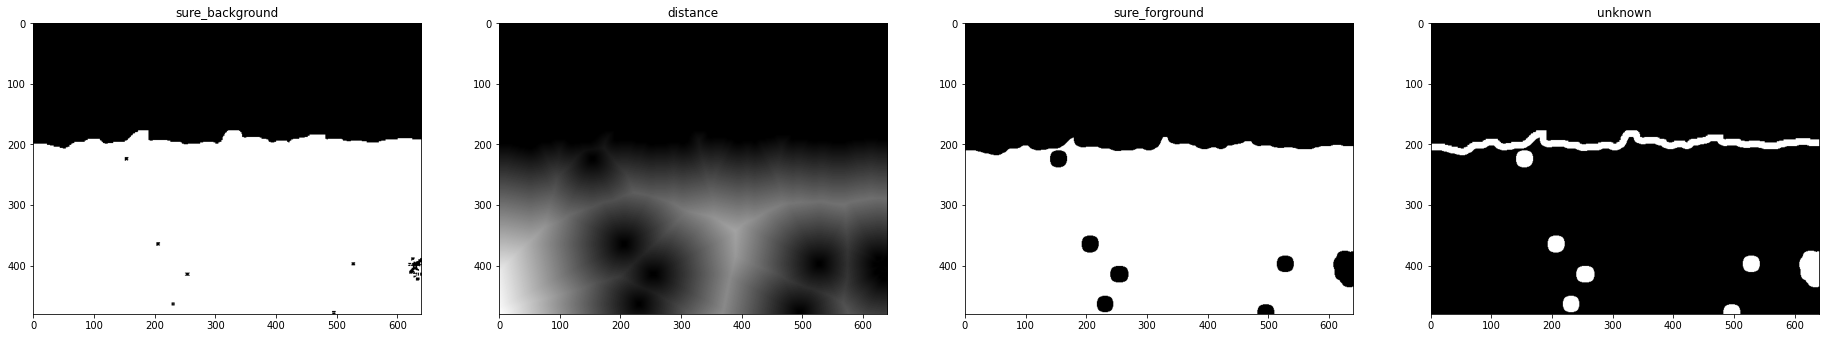

In [13]:
sure_bg_line = cv2.bitwise_and(laplacian_thresh_depth, sure_bg)
dist_transform = cv2.distanceTransform(sure_bg_line, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.05 * dist_transform.max(), 255, 0)
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

plt.figure(figsize=(32, 6))
plt.subplot(1, 4, 1)
plt.title('sure_background')
plt.imshow(sure_bg_line, cmap='gray')
plt.subplot(1, 4, 2)
plt.title('distance')
plt.imshow(dist_transform, cmap='gray')
plt.subplot(1, 4, 3)
plt.title('sure_forground')
plt.imshow(sure_fg, cmap='gray')
plt.subplot(1, 4, 4)
plt.title('unknown')
plt.imshow(unknown, cmap='gray')

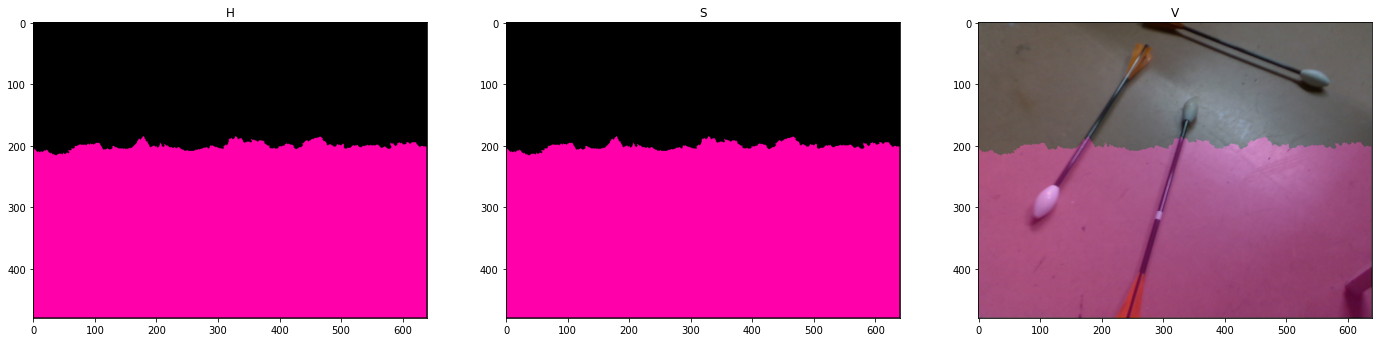

In [14]:
# Marker labelling
ret, markers_unknown = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers_unknown = markers_unknown + 1

# Now, mark the region of unknown with zero
markers_unknown[unknown==255] = 0

markers = cv2.watershed(image_color, markers_unknown)

def marker2colormap(markers):
    markers_color = cv2.convertScaleAbs(markers, alpha=(255 / np.max(markers)))
    markers_color = cv2.applyColorMap(markers_color, cv2.COLORMAP_RAINBOW)
    markers_color[markers == -1] = [0, 0, 0]
    markers_color[markers == 1] = [0, 0, 0]
    return markers_color

markers_unknown_color = marker2colormap(markers_unknown)
markers_color = marker2colormap(markers)

blended = cv2.addWeighted(
    src1=image_color_RGB,
    alpha=0.7,
    src2=markers_color,
    beta=0.3,
    gamma=0)

plt.figure(figsize=(24, 6))
plt.subplot(1, 3, 1)
plt.title('H')
plt.imshow(markers_unknown_color)
plt.subplot(1, 3, 2)
plt.title('S')
plt.imshow(markers_color)
plt.subplot(1, 3, 3)
plt.title('V')
plt.imshow(blended)

In [15]:
plt.figure(figsize=(20, 20))
markers[markers == -1] = 0
label_num = np.max(markers)
print(label_num)
mask_list = []
for i in range(2, label_num):
    mask = copy.deepcopy(markers)
    mask = np.uint8(mask)
    mask[markers != i] = 0
    mask[markers == i] = 1

    mask_copy = copy.deepcopy(mask)
    mask_copy[image_depth == 0] = 0
    point_num = np.sum(mask_copy)
    if point_num > 500: mask_list.append(mask)

rowcol = np.ceil(np.sqrt(len(mask_list)))
for i in range(len(mask_list)):
    plt.subplot(rowcol, rowcol, i + 1)
    # plt.title('label {}  {} points'.format(i, np.sum(mask)))
    plt.imshow(mask_list[i], cmap='gray')

2


<Figure size 1440x1440 with 0 Axes>